In [1]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
</style>
""")

# Covariance and Correlation

**Overview**
This exercise is an introduction to correlation and covariance matrix.
The exercise will guide:
- Understanding of what **covariance** and **correlation** are.
- Implementation of both matrices using basic NumPy operations.
- Interpreting the meaning of these matrices in terms of variable relationships.


In data analysis and machine learning, understanding the relationships between variables is crucial.

Two key tools for this are the **covariance** and **correlation** matrices.
Recall the definitions: 

$$
\text{Covariance: }\newline  \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

$$\text{ }\newline$$

$$
\text{Correlation: } \newline   \text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$
The cell below defines a synthetic dataset containing 4 features, the data could resemble _height_, _weight_, _age_ and _shoe size_ of a set of people. 

---
**Task 1 (medium): Reflect on theory💡📽️**
1. Explain the key characteristics of covariance and correlation. Use the following questions to guide your explanation.    - What does each one assess?
    - How do they describe relationships between variables differently?
    - Why might you prefer one measure over the other in analysis?
    - What does a covariance of zero mean? Does it imply independence?
    - Why are the diagonal elements of the covariance matrix always the variances of the variables?
    - Why are the diagonal elements of the correlation matrix always equal to 1?
    - What does the sign of a covariance or correlation value tell us?
    - Can two variables be strongly related but have a correlation close to zero? Under what circumstances?




---

In [12]:
## Answer:
#- Covariance assesses whether or not there is a linear relationship betweeen variables, and in which direction the relationship is (negative or positive). Correlation also indicates the strength of the relationship between variables. Correlation scales covariance, removing the units of measurement, so the coefficient is always between -1 and 1
#    - 1: perfect positive linear relationship
#    - 0: no linear relationship
#    - -1: perfect negative linear relationship
#- Analysis with the correlation matrix can give better structure in the data and better show relationships between variables, if the variables' scales differ a lot. Then it's more intuitive to look at the scaled values of correlation rather than covariance. 
#- A covariance of zero means that x and y are linearly independent. Covariance measures the linearity between two variables, but it can't exclude other relationships such as quadratic, cubic or other nonlinear relationships.
#- Diagonal elements of covariance matrix are the variances of variables with themselves eg. Cov(x1, x1) = variances e.g. Var(x1) .
#- Diagonal elements of correlation matrix are always equal to 1 because a variable will always have a perfect positive linear relationship with itself. 
#- Yes they can be strongly related but have a correlation close to zero. Correlation is only about the linear relationship, but two variables could fx have a quadratic relationship - then the correlation would be close to zero but the variables are still strongly related.


---
**Task 2 (easy): Generate data👩‍💻**
1. Run the cell below to load the data.


---

In [11]:
import numpy as np
import pandas as pd
import util_corr_cov

data = {
    'Height': [150, 155, 160, 165, 170, 175, 180, 185, 190, 195],
    'Weight': [50, 53, 57, 60, 65, 70, 72, 75, 78, 80],
    'Age':    [21, 22, 23, 26, 27, 28, 30, 23, 25, 31],
    'Shoe_Size': [36, 37, 38, 39, 40, 41, 42, 41, 42, 39]
}

df = pd.DataFrame(data)
X = df.values
df


print(X.shape[1])
print(X[0])

print(X)

4
[150  50  21  36]
[[150  50  21  36]
 [155  53  22  37]
 [160  57  23  38]
 [165  60  26  39]
 [170  65  27  40]
 [175  70  28  41]
 [180  72  30  42]
 [185  75  23  41]
 [190  78  25  42]
 [195  80  31  39]]



---
**Task 3 (easy): Calculate 1👩‍💻**
1. Complete the functions `covariance_matrix`
 and `correlation_matrix`
.

**Important**
It is not allowed to use built-in covariance/correlation functions.




---

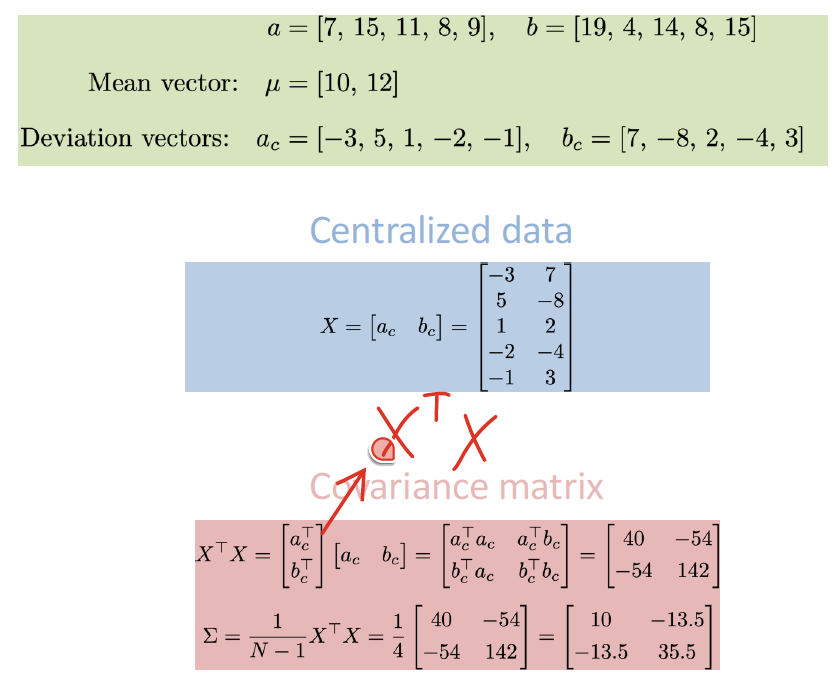

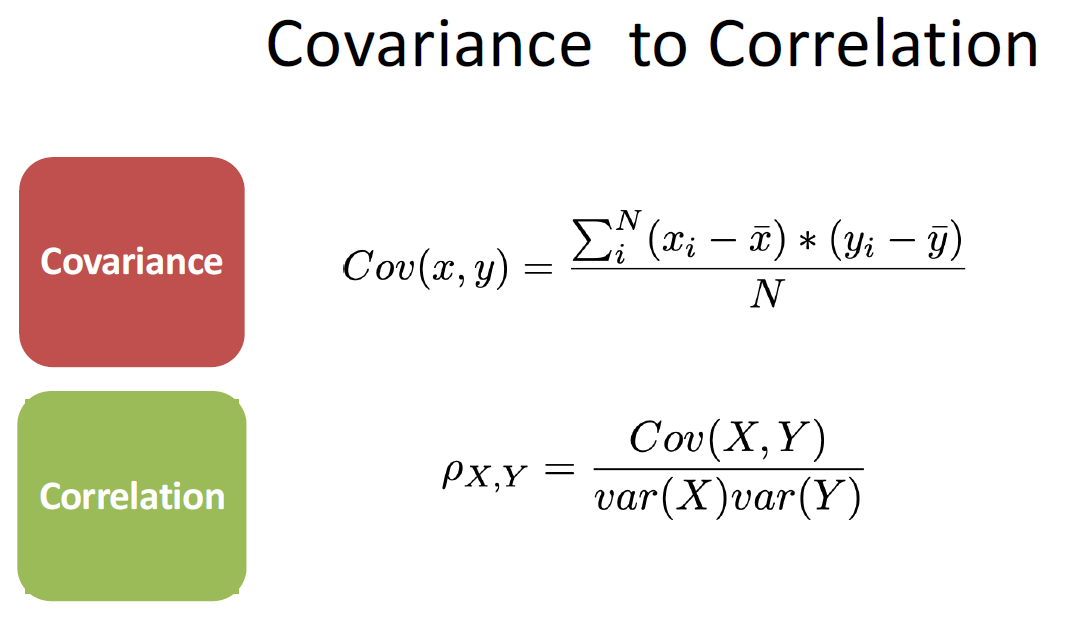

In [29]:
def covariance_matrix(X):
    """
    Computes the covariance matrix manually.

    Parameters
    ----------
    X : numpy.ndarray, shape (n_samples, n_features)

    Returns
    -------
    cov_matrix : numpy.ndarray, shape (n_features, n_features)
        A square matrix representing the covariance between each pair of variables.
    """

    samples = X.shape[0]
    features = X.shape[1]

    #print(X)

    mean_X = np.mean(X,0)

    #print(mean_X)

    Centralised_data = (X - mean_X)

    #print(Centralised_data)

    covariance_matrix = (Centralised_data.T @ Centralised_data) / (samples-1)

    return covariance_matrix


def correlation_matrix(X):
    """
    Computes the correlation matrix manually using the covariance matrix.

    Parameters
    ----------
    X : numpy.ndarray, shape (n_samples, n_features)

    Returns
    -------
    corr_matrix : numpy.ndarray, shape (n_features, n_features)
        A square matrix representing the correlation between each pair of variables.
    """
    samples = X.shape[0]
    features = X.shape[1]

    C_covariance_matrix = covariance_matrix(X)

    # Get the variances of the matrix(This is the diagonals)
    diagonal = np.diag(C_covariance_matrix)
    
    #Because the variation is sigma squared.
    standard_deviation = np.sqrt(diagonal)


    # Because we should find the correlation between each feature, we need to create the matrix for this.
    # i.e. we need to find the correlation between height-height, height-weight, ... weight-height, weight-wegiht ...
    # therefore we use np.outer, that takes each element in the 
    standard_deviation_matrix = np.outer(standard_deviation, standard_deviation)


    return C_covariance_matrix/standard_deviation_matrix



---
**Task 4 (easy): Calculate 2👩‍💻**
1. Run the cell below to calculate and visualize the covariance and correlation matrix.


---

Covariance Matrix:
 [[229.16666667 160.          34.44444444  24.16666667]
 [160.         112.88888889  24.55555556  18.        ]
 [ 34.44444444  24.55555556  11.6          4.        ]
 [ 24.16666667  18.           4.           4.27777778]]

Correlation Matrix:
 [[1.         0.99476079 0.66805846 0.77184824]
 [0.99476079 1.         0.6785708  0.81910164]
 [0.66805846 0.6785708  1.         0.56783465]
 [0.77184824 0.81910164 0.56783465 1.        ]]


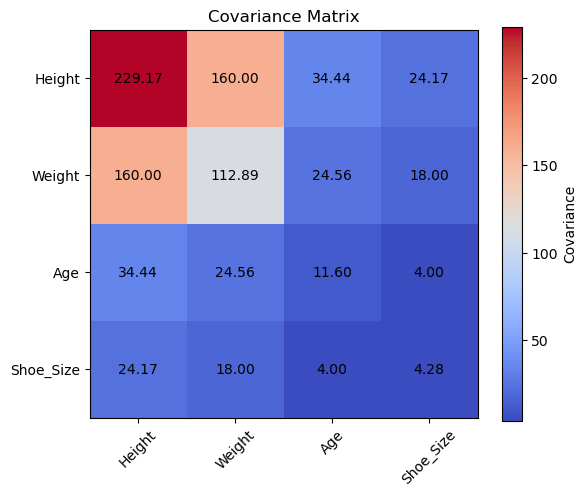

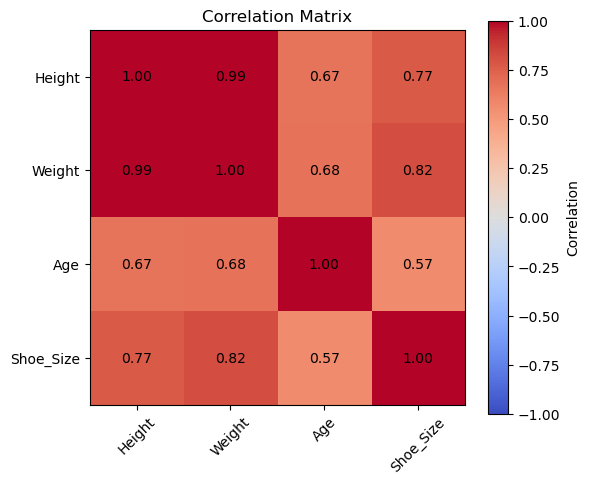

In [30]:
cov_mat = covariance_matrix(X)
print("Covariance Matrix:\n", cov_mat)

corr_mat = correlation_matrix(X)
print("\nCorrelation Matrix:\n", corr_mat)

util_corr_cov.plot_cov(df, cov_mat)
util_corr_cov.plot_corr(df, corr_mat)


---
**Task 5 (medium): Reflection💡📽️**
Reflect on the results. Use the following questions to guide your reflection:
1. Look at your covariance matrix. Which variables have the largest variances? What does that tell you?
2. Which pairs of variables have the highest positive covariance or correlation?
3. Which pairs show negative or near-zero relationships? What might that indicate?
4. Do the results align with what you expected from the dataset?
5. Compare your covariance and correlation matrices:
6. How do the magnitudes of the numbers differ?
7. What stays consistent between them?
8. Why might correlation be a more useful comparison measure when variables are in different units or scales?
9. If two variables have a high covariance but a low correlation, what might that suggest about the scales or units involved?


---

In [0]:
# 1.
# If we look at pairs of same variable:
#       Height-height has the largest co-variance(229.17). This means that the height may very largely across 
#       people we measure.(In contrast shoesize-shoesize has the lowest, which means that it would
#       probably very the least when we look at the data)
# If we look at pairs of different variable:
#       Height-weight has the largest co-variance (160.0). This means in general that the highest individuals
#       would tend to weigh more, and vice versa. 

#       EXTRA EXPLAINATION FOR CLASPER!
#       (This can be seen because the variance is so high, and it is also positive. If it for
#       example would have been negative, then it would show that it had a negative correlation,
#       i.e. that higher people would tend to weigh less. recall: Cov(X,Y)=E[(X−μ_X​)(Y−μ_Y​)]
#       , where μ is the mean of each point) 
#       (i.e. for a point early on, if the X point is high, 
#       but μ_X  is lower, and Y point is low, 
#       but μ_Y  is higher, then it would be:
#       Cov(X,Y)=E[(positive number​)(negative number​)], and would therefore ACTUALLY sum up 
#       to a negative number! If enough points does this, then it would at last give a negative
#       covariance value..) IF THIS MAKES NO SENSE, ASK CASPER, he thinks he knows at least.
#       EXTRA: husk at det hele bliver smidt ind i expected value så det behøver ikke gælde for all X,Y par. 

#--------------------------------

# 2.
# If we assume we exclude the pairs of itself(i.e. height-height, weight-weight, ... ) 
# (WHICH WE OF COURSE DO, BECAUSE THIS VALUE IS VARIANCE, AND NOT COVARIANCE), 
# then we would say height-weight, which has a covariance of (160.0), and a correlation of
# (0.99). This as mentioned above means that the highest individuals
# would tend to weigh more, and vice versa. 

#--------------------------------

# 3.
# shoe_size and age show near zero relation-ship in Covariance. Which shows that the age
# barely affects the shoe size in this set. This means we would usually not be able to say things
# like "You are older, and therefore have a bigger shoe size."
# As can be seen in the correlation matrix, it has a correlation of 0.57, which is not very high either.


#--------------------------------

# 4.
# Yes, height and weight both increase linearly, as can be seen in the high numbers in the 
# covariance matrix and the correlation matrix.
# AND age and shoesize does not increase lineraly or in the same increases/decreases to each other.
# In addition to this, usually in most people shoe size stagnate at some stage of your life.

#-------------------------------

# 5. 
# Compared (next question)

#--------------------------------

# 6.
# The 'Correlation matrix', essentially removes the units the original data points might have been in.
# Therefore it basiaccally makes it easier to compare the exact correlation between the data, 
# with the range of [-1, 1] for all units.
#
# example:
# Cov(Height, Weight) = 160.00  ->  Correlation ≈ 0.99
# Cov(Age, Shoe_Size) = 4.00  ->  Correlation ≈ 0.56

# (In the example it can be hard to see that the values dont actually differ that much. It is 
# easier seen in the Correlation Matrix.)

#--------------------------------

# 7.
# There is consistency in the positivity of the values – this would have been more clear if 
# any of the covariance was negative resulting in negative correlations (because the variance 
# can’t be negative due to it being the square of the standard deviation) 

# – there is also some consistency in numerically high covariance leading to correlations closer to 1, 
# but this fails to hold when you compare high covariances to high correlations due to the 
# size of the variance of the variables 

#--------------------------------

# 8.
# Because then we can quickly spot correlation between data, without necissarily knowing
# what units we are in.

# LONGER EXPLAINATION:
# correlation is also more useful when looking at data with difference scales 
# because of the standardization from -1 to +1, because it measures the strength and direction 
# of the linear relationship independence from the variables' scales. 
# Where covariances can be quite large when dealing with data of numerically big values 
# because of its mathematical structure of taking the expected value of the products of ’absolute’ 
# distances to the mean.


#--------------------------------

# 9.
# If we just look at the mathematical expressions of covariance and correlation then as it 
# has been argued large scale data with high numerical values tend to have numerically larger 
# covariance (whether it is positive or negative) and also larger variance (recall that the 
# variance of X is just the covariance between X and itself, so again will larger scale data 
# tend to lead to larger differences between an arbitrary datapoint and the mean) as a result 
# of this the correlation is then relatively smaller as the variances appear in the denominator. 

# -ANSWER-
# Therefore a high covariance and a low correlation might suggest that the scale of the data 
# is large – take for example age and weight in the fabricated data where the covariance 
# (as well as the variances) are large but the correlation is smaller compared to the others 
# – this effect would be even more apparent if the scales where larger (like height in 
# millimeters and age in weeks or other ridiculous things)


